<a href="https://colab.research.google.com/github/terry0809000/tensorflow22/blob/main/02pytorchclassifications.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#02. Neural network classification with Pytorch

In [2]:
import sklearn
from sklearn.datasets import make_circles
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

In [3]:
n_samples = 1000
x,y =make_circles(n_samples,noise=0.03,
                  random_state=42)

In [4]:
len(x), len(y)

(1000, 1000)

In [5]:
print(f"First 5 samples of X: {x[:5]}")
print(f"First 5 sampels of y: {y[:5]}")

First 5 samples of X: [[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
First 5 sampels of y: [1 1 1 1 0]


In [6]:
y

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,

In [7]:
import pandas as pd
circles = pd.DataFrame({"X1":x[:,0],
                       "X2":x[:,1],
                       "label":y})
circles.head(10)

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


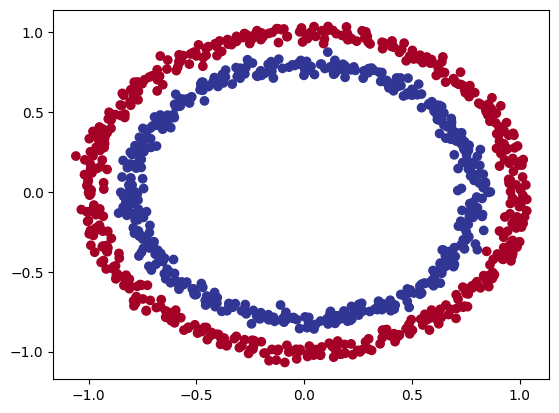

In [8]:
import matplotlib.pyplot as plt
plt.scatter(x=x[:,0],
           y=x[:,1],
           c=y,
           cmap=plt.cm.RdYlBu);

In [9]:
#note: the data weare working with is often referred to as a toy dataset, a dataset that is small enough to experiment but still sizeable enough

In [10]:
#check input and output shapes
x.shape, y.shape #y is a scalar

((1000, 2), (1000,))

In [11]:
x

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [12]:
x_sample = x[0]
y_sample = y[0]
print(f"Sample input features: {x_sample} and the same for y: {y_sample}")
print(f"shapes for one sample of x:{x_sample.shape}and the same for y;{y_sample.shape}")

Sample input features: [0.75424625 0.23148074] and the same for y: 1
shapes for one sample of x:(2,)and the same for y;()


In [13]:
import torch
torch.__version__
type(x)

numpy.ndarray

In [14]:
x= torch.from_numpy(x).type(torch.float)
y=torch.from_numpy(y).type(torch.float)
x[:5], y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

In [15]:
type(x), x.dtype, y.dtype

(torch.Tensor, torch.float32, torch.float32)

In [16]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test=train_test_split(x,
                                                  y,
                                                  test_size=0.2,
                                                  random_state=42)


In [17]:
len(x_train), len(x_test), len(y_train), len(y_test)


(800, 200, 800, 200)

In [18]:
n_samples

1000

In [19]:
##2.  buidling a model
#let's build a model to classify our blue and red dots
#1, setup device agonistic code so that our code will run on gpu if there is one
#2. construct a model(by subclassing"nn.module)
#3. define a loss funcytionm anmd optimizer
#4. creat a training and test loop

In [21]:
import torch
from torch import nn
device ="cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [22]:
x_train

tensor([[ 0.6579, -0.4651],
        [ 0.6319, -0.7347],
        [-1.0086, -0.1240],
        ...,
        [ 0.0157, -1.0300],
        [ 1.0110,  0.1680],
        [ 0.5578, -0.5709]])

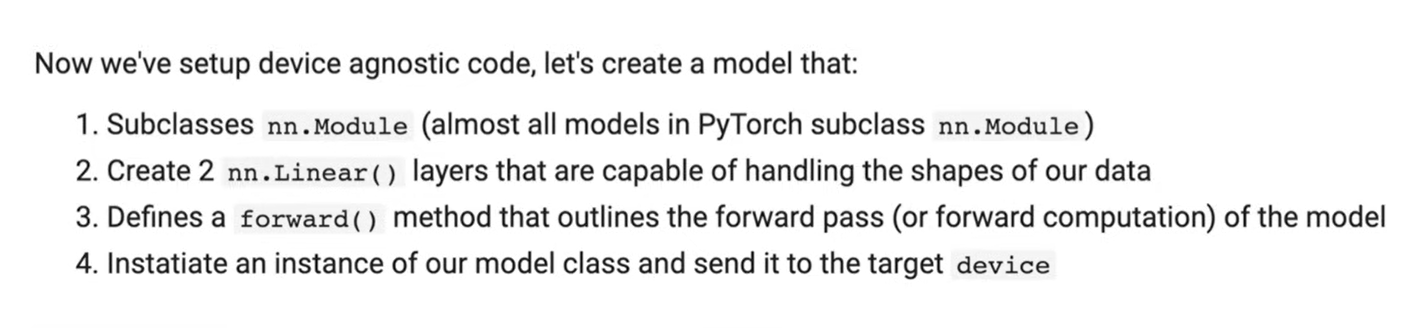

In [32]:
from sklearn import datasets
#1. construct a model that subclasses nn.module
class CircleModelV0(nn.Module):
  def __init__(self) :
    super().__init__()
    #2. create 2 nn. linear layers capable of handling the shapes of our data
    #self.layer_1=nn.Linear(in_features=2,out_features=5)# take in 2 features and update
    #self.layer_2=nn.Linear(in_features=5, out_features=1) #take in 5 features from above
  #define a forward() method that outline te forward poass
    self.two_linear_layers = nn.Sequential(
      nn.Linear(in_features=2,out_features=5),
      nn.Linear(in_features=5, out_features=1)
    )
  def forward(self,x):
    return self.two_linear_layers(x) #x-> layer_1 -> layer_2 -> output

#4. Instantiate an instance of our model class and send it to the targetr device

model_0 = CircleModelV0().to(device)
model_0

CircleModelV0(
  (two_linear_layers): Sequential(
    (0): Linear(in_features=2, out_features=5, bias=True)
    (1): Linear(in_features=5, out_features=1, bias=True)
  )
)

In [33]:
device

'cuda'

In [34]:
next(model_0.parameters()).device

device(type='cuda', index=0)

In [35]:
model_0 = nn. Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=5, out_features=1)
).to(device)

model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [20]:
#make predictions

In [36]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[ 0.6922,  0.2994],
                      [-0.3315,  0.5027],
                      [ 0.0387,  0.1943],
                      [-0.1621,  0.5220],
                      [-0.3585,  0.4742]], device='cuda:0')),
             ('0.bias',
              tensor([-0.0662,  0.0375, -0.5152,  0.5286,  0.3426], device='cuda:0')),
             ('1.weight',
              tensor([[-0.0138,  0.1740,  0.0013, -0.2880, -0.1972]], device='cuda:0')),
             ('1.bias', tensor([-0.0715], device='cuda:0'))])

In [37]:
#make predictions
untrained_preds = model_0(x_test.to(device))
print(f"length of predictions :{len(untrained_preds)},shaoe:{untrained_preds.shape}")
print(f"Length of test samples: {len(x_test)},shape:{x_test.shape}")
print(f"\nFirst 10 predictions :\n{untrained_preds[:10]}")
print(f"\nFirst 10 labels:\n{y_test[:10]}")

length of predictions :200,shaoe:torch.Size([200, 1])
Length of test samples: 200,shape:torch.Size([200, 2])

First 10 predictions :
tensor([[-0.4128],
        [-0.4376],
        [-0.2694],
        [-0.4537],
        [-0.1452],
        [-0.1613],
        [-0.3297],
        [-0.2647],
        [-0.2748],
        [-0.4379]], device='cuda:0', grad_fn=<SliceBackward0>)

First 10 labels:
tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


In [20]:
#2.1 setup loss function and optimizer
#which loss function or optimizer should you use
#e.g for regression you might want MAE OR MSE (MEAN ABSOLUTE ERROR OR MEAN SQUARED ERROR)
# FOR CLASSIFICATION YOU MIGHT WANT BINAR cross entropy or categorical cross entropy(cross entropy)
#as a remainder a loss function measures how bad the prediction function is